In [1]:
# Set seed
import random
random.seed(10)

In [2]:
# Generate normally distributed random variables
import numpy as np
mu, sigma = 0, 0.1 # mean and std dev
x= np.random.normal(mu, sigma, 100)
print(x[1:10])

[-0.19019198 -0.05347966  0.15709762 -0.02036097  0.25765544 -0.155887
  0.01362505  0.02275986 -0.23704077]


In [3]:
def my_mean(y):
    """Returns mean of list
    params: list"""
    
    s=0
    for el in y: s+=el
    return s/len(y)

In [4]:
def my_var(y):
    """Returns variance of list
    params: list"""
    
    v=0
    m=my_mean(y)
    for el in y: v+=(el-m)**2
    return v/(len(y)-1)    

In [5]:
# Difference of calculated mean with built-in mean
my_mean(x)-np.mean(x)           

3.469446951953614e-18

In [6]:
# Difference of calculated variance with built-in variance
my_var(x)-np.var(x)

9.398139592306509e-05

In [7]:
def summary_stat(y):
    """Returns mean and variance of list
    params: list"""
    
    return (my_mean(x),my_var(x))

summary_stat(x)

(-0.021176997402171778, 0.00939813959230572)

In [20]:
import os 
cwd = os.getcwd()
#dir_path = os.path.dirname(os.path.realpath("Iris.csv"))
cwd

'/Users/sharvitomar/Desktop/Sem1/432/HW'

In [21]:
import pandas as pd
iris = pd.read_csv("Iris.csv")
iris.head(-5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
140,141,6.7,3.1,5.6,2.4,Iris-virginica
141,142,6.9,3.1,5.1,2.3,Iris-virginica
142,143,5.8,2.7,5.1,1.9,Iris-virginica
143,144,6.8,3.2,5.9,2.3,Iris-virginica


In [22]:
iris.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [23]:
#iris["Species"].describe()
models =  list(set(list(iris["Species"])))
models

['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

In [24]:
# Changing the class labels of the Species variable
iris["Species"] = iris["Species"].map({"Iris-setosa": "1", "Iris-versicolor": "2","Iris-virginica":"3"})

In [25]:
# Changing the variable name from Species to Type
iris = iris.rename(columns={'Species': 'Type'})
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Type
0,1,5.1,3.5,1.4,0.2,1
1,2,4.9,3.0,1.4,0.2,1
2,3,4.7,3.2,1.3,0.2,1
3,4,4.6,3.1,1.5,0.2,1
4,5,5.0,3.6,1.4,0.2,1


In [26]:
iris["Type"]

0      1
1      1
2      1
3      1
4      1
      ..
145    3
146    3
147    3
148    3
149    3
Name: Type, Length: 150, dtype: object

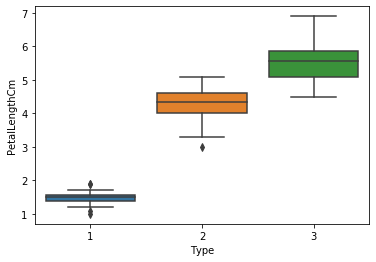

In [27]:
import seaborn as sns
ax = sns.boxplot(x="Type", y="PetalLengthCm", data=iris)

In [28]:
# Checking data type of Type variable
iris.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Type              object
dtype: object

In [29]:
# Preparing Type variable for linear regression model
cat_var=iris["Type"]
cat_var=pd.get_dummies(data=cat_var)

iris=pd.concat([iris,cat_var], axis=1)
iris=iris.drop(columns=['Type','Id'])
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,1,2,3
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0


In [30]:
list(iris.columns)

['SepalLengthCm',
 'SepalWidthCm',
 'PetalLengthCm',
 'PetalWidthCm',
 '1',
 '2',
 '3']

In [32]:
# Creating a linear model to estimate Petal.Length using all other four covariates.
from sklearn.linear_model import LinearRegression
X=iris[["SepalLengthCm","SepalWidthCm","PetalWidthCm","1","2","3"]]
y=iris["PetalLengthCm"]
model=LinearRegression(fit_intercept=False).fit(X,y)

In [33]:
# Reporting coefficients
model.coef_

array([ 0.61008216, -0.18725582,  0.60289601, -1.09713753,  0.3578108 ,
        0.86821021])

In [34]:
# Reporting intercept
model.intercept_

0.0

In [35]:
# Generating linear model summary to see statistically significant variables
import statsmodels.api as sm
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:          PetalLengthCm   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     1313.
Date:                Sun, 21 Nov 2021   Prob (F-statistic):          3.42e-118
Time:                        11:42:33   Log-Likelihood:                -9.3888
No. Observations:                 150   AIC:                             30.78
Df Residuals:                     144   BIC:                             48.84
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0322      0.194      0.166

/Users/sharvitomar/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2580: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [36]:
# Reporting p-values of variates
for i in range(len(list(X2.columns))):
    print(est2.pvalues[i])     

0.8683113524712343
8.691597282556968e-24
0.02163082098199779
2.0734601388357794e-06
4.4192300995888613e-13
4.33901712205975e-05
2.0735648385961476e-08


In [37]:
# Saving the iris data into a .csv file
iris.to_csv(r'/Users/sharvitomar/Desktop/Sem1/432/HW/my_iris.csv',index=False, header=True)

In [38]:
# Reading the data from that file back into R
my_iris=pd.read_csv("my_iris.csv")

In [39]:
# Checking values in new data same as the original one
my_iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,1,2,3
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0


In [40]:
my_iris.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
1                  int64
2                  int64
3                  int64
dtype: object